# AllLife Bank Customer Segmentation Project
### Anish Indukur

In [99]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# Library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# to be used for data scaling and on hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# for hyperparmeter tuning
from sklearn.model_selection import RandomizedSearchCV

# define maxinum number of columns
pd.set_option("display.max.columns", None)
# scientification notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# pd.set_option("precision", 2)

# model building
from scipy.spatial.distance import cdist
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.stats import zscore

from sklearn import metrics

# To suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [100]:
data = pd.read_excel('/Users/anish/Desktop/School/AIML/Datasets/Credit+Card+Customer+Data.xlsx')

In [101]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help



### Objective

* Classify customers into groups that help us analyze behavior.
* Glean enough information to generate business insights and reccomendations that can help grow business. 

Data Dictionary:
* Sl_No: Primary key of the records
* Customer Key: Customer identification number
* Average Credit Limit: Average credit limit of each customer for all credit cards
* Total credit cards: Total number of credit cards possessed by the customer
* Total visits bank: Total number of visits that customer made (yearly) personally to the bank
* Total visits online: Total number of visits or online logins made by the customer (yearly)
* Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# Data Pre-Processing

In [102]:
data.isna().sum()


Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

No missing values to deal with

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [104]:
for col in data.columns:
    print(data[col].value_counts())
    print('-'*30)

1      1
435    1
437    1
438    1
439    1
      ..
221    1
222    1
223    1
224    1
660    1
Name: Sl_No, Length: 660, dtype: int64
------------------------------
97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer Key, Length: 655, dtype: int64
------------------------------
8000      35
6000      31
9000      28
13000     28
19000     26
          ..
43000      1
146000     1
155000     1
200000     1
167000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64
------------------------------
4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64
------------------------------
2    158
1    112
0    100
3    100
5     98
4     92
Name: Total_visits_bank, dtype: int64
------------------------------
2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
10      6
12      6
8       6
11    

In [105]:
data.drop_duplicates(inplace=True)
data.shape

(660, 7)

No duplicates.


We can drop the Sl_No and Customer Key Columns since they provide no value to our analysis.

In [106]:
data.drop('Sl_No', axis = 1, inplace=True)
data.drop('Customer Key', axis = 1, inplace=True)

In [107]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.000,34574.242,37625.488,3000.000,10000.000,18000.000,48000.000,200000.000
Total_Credit_Cards,660.000,4.706,2.168,1.000,3.000,5.000,6.000,10.000
Total_visits_bank,660.000,2.403,1.632,0.000,1.000,2.000,4.000,5.000
Total_visits_online,660.000,2.606,2.936,0.000,1.000,2.000,4.000,15.000
Total_calls_made,660.000,3.583,2.865,0.000,1.000,3.000,5.000,10.000


# Exploratory Data Analysis

## Univariate Analysis

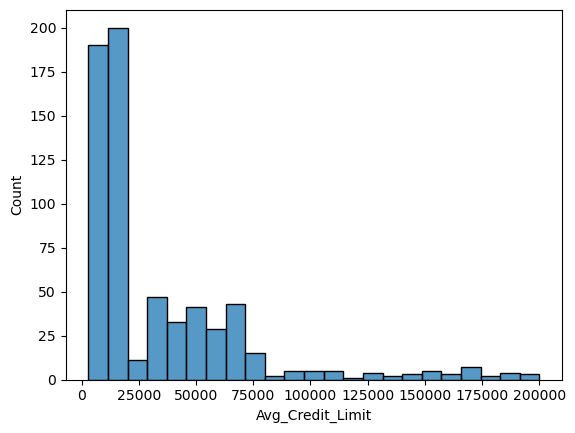

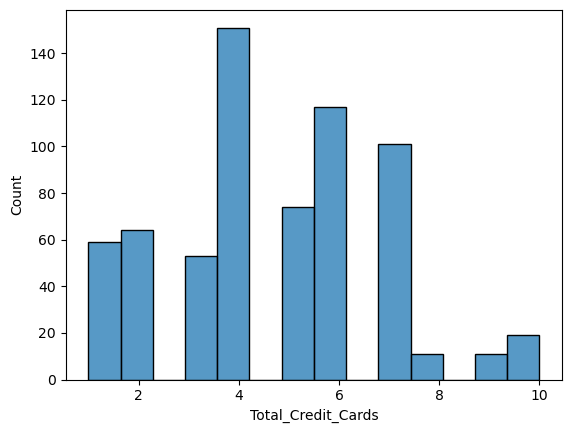

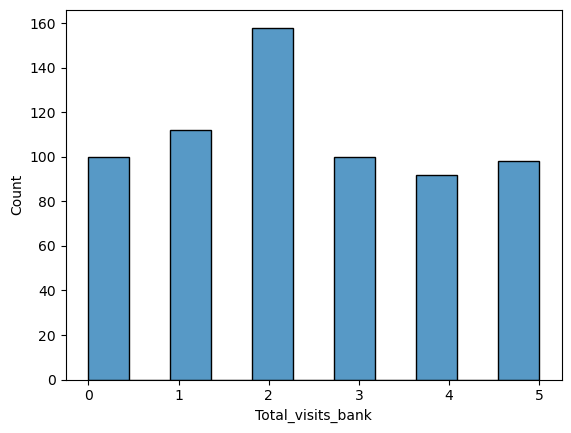

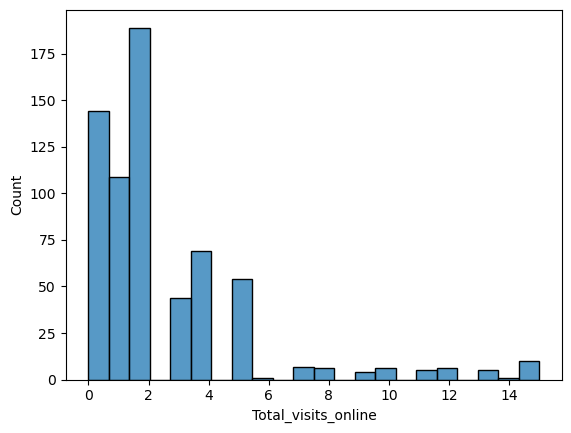

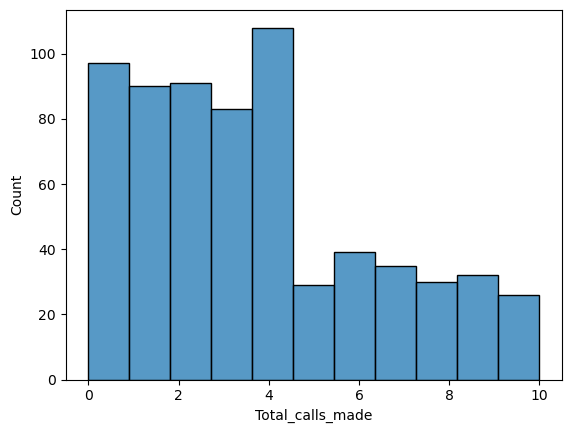

In [108]:
for col in data.columns:
    sns.histplot(data=data[col])
    plt.show()

Obersvations:
* Avg Credit Limit is very right skewed, majority of customers have no limit or very low limit. 
* Total Credit cards is slightly right skewed, but mostly normal distribution.
* Total Visits to bank is normally distributed, no pattern in the data. 
* Total Calls Made is right skewed, relatively fewer customers placed 5 or more calls to the bank.
* There are outliers in a few variables, but we do not need to remove them as they may be indicative of a seperate group. 


## Bivariate Analysis

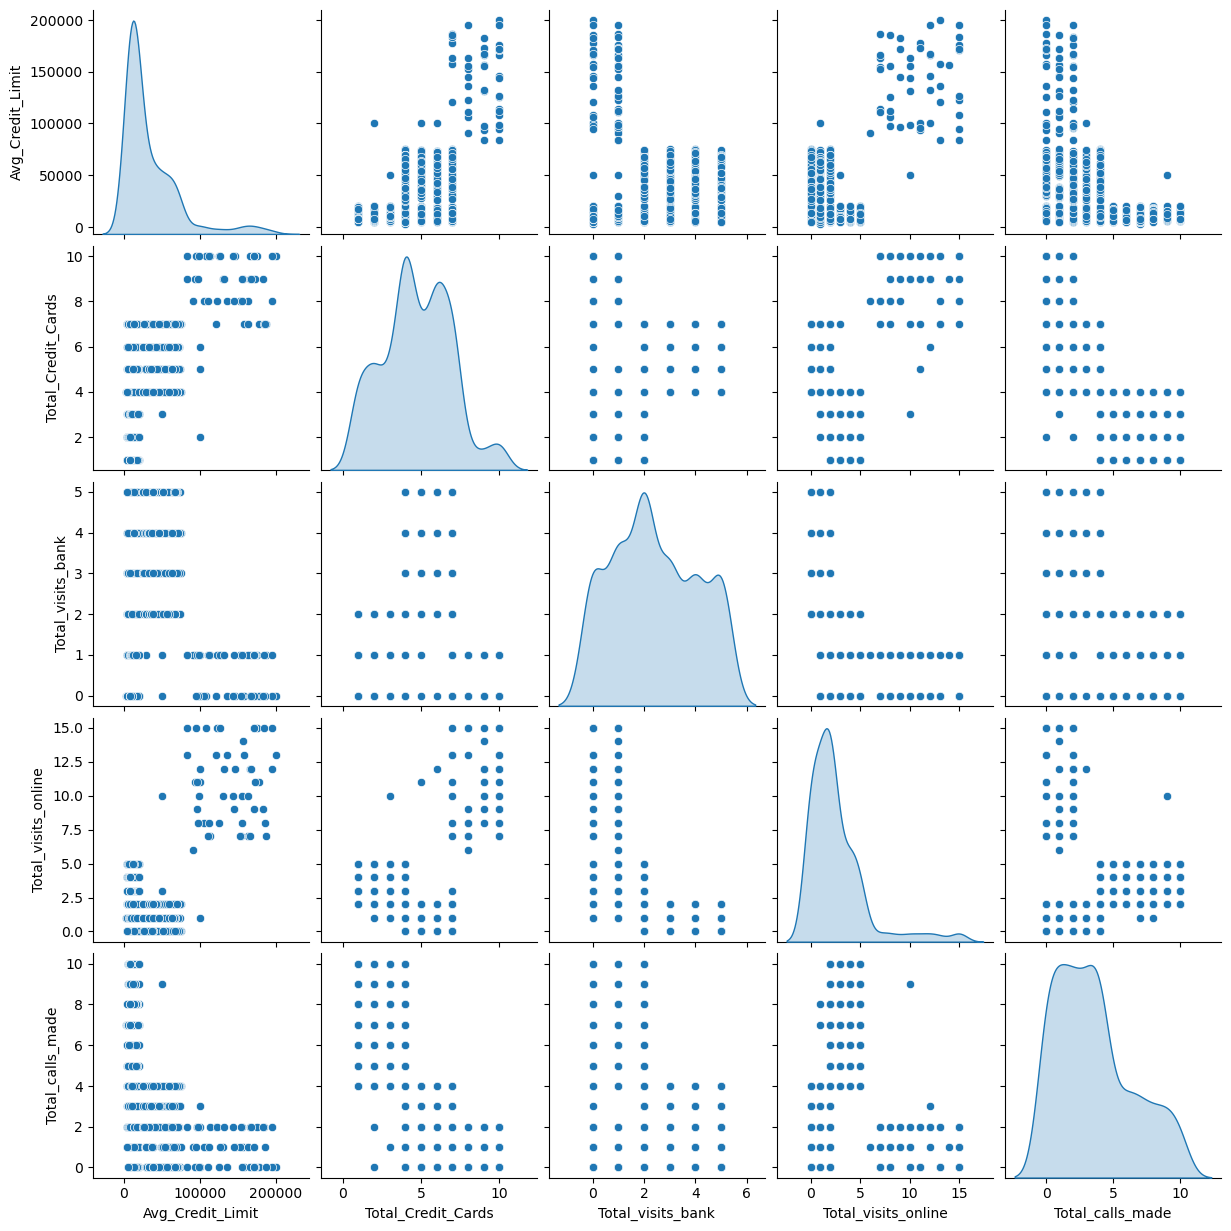

In [109]:
sns.pairplot(data, diag_kind='kde')

<AxesSubplot:>

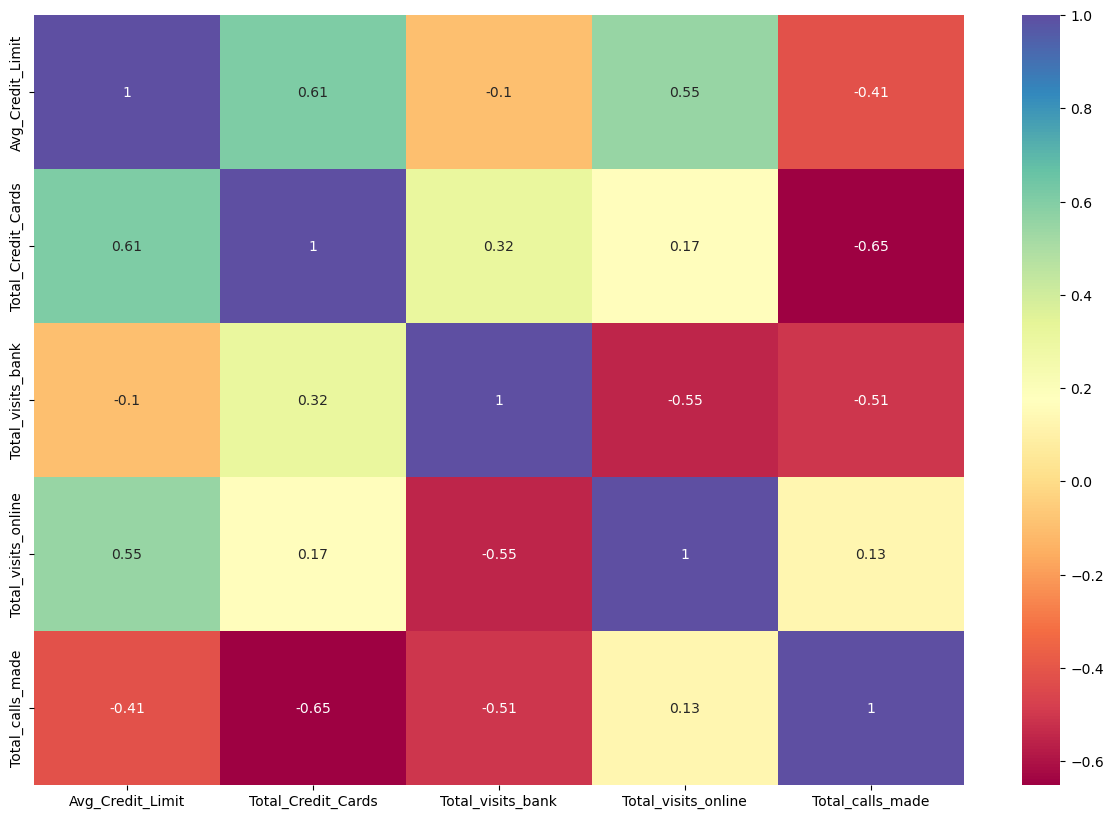

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(data = data.corr(), annot=True, cmap='Spectral')

Observations:
* Strong correlation between Avg Credit Limit and Total Credit Cards, which is logical since customers with more credit cards will have more credit they can take out. 
* Strong correlation between Online visits and Average Credit Limit, but not between online visits and total credit cards. This probably means that custoemrs who prefer to interact online have fewer credit cards but a larger credit limit on their card, meaning they are valuable customers. 
* Weak correlation between online visits, bank visits, and calls, meaning there are most likely three seperate groups of customers that prefer each type of interaction, and some customers who are between the groups. 
* Strong negative correlation between total calls made and credit limit, credit cards, and bank visits. These customers are most likely the least profitable for the bank. 

# Model Building

In [111]:
#Scaling Data
dataScaled = data.apply(zscore)

## K-Means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

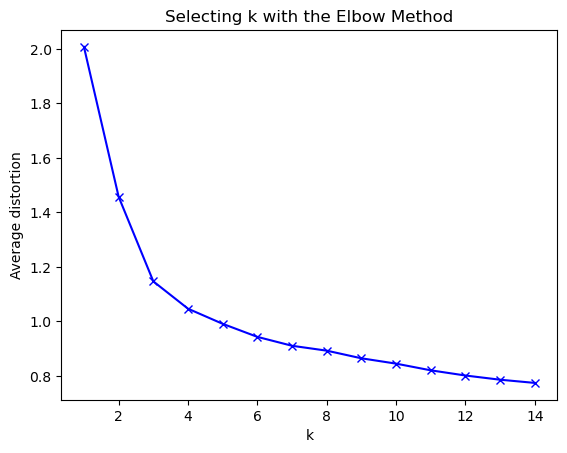

In [112]:
clusters = range(1,15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(dataScaled)
    prediction = model.predict(dataScaled)
    meanDistortions.append(sum(np.min(cdist(dataScaled, model.cluster_centers_, 'euclidean'), axis = 1)) / dataScaled.shape[0])
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
    

Bend shows clearly around 3 groups.

In [113]:
# K=3 clusters
dataGroups = data.copy()

final_model = KMeans(3)
final_model.fit(dataScaled)
prediction = final_model.predict(dataScaled)

dataGroups['Group'] = prediction
dataGroups.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [114]:
from sklearn.metrics import silhouette_score
labels = final_model.labels_
silhouette_score(dataScaled, labels, metric="euclidean")

0.5157182558882754

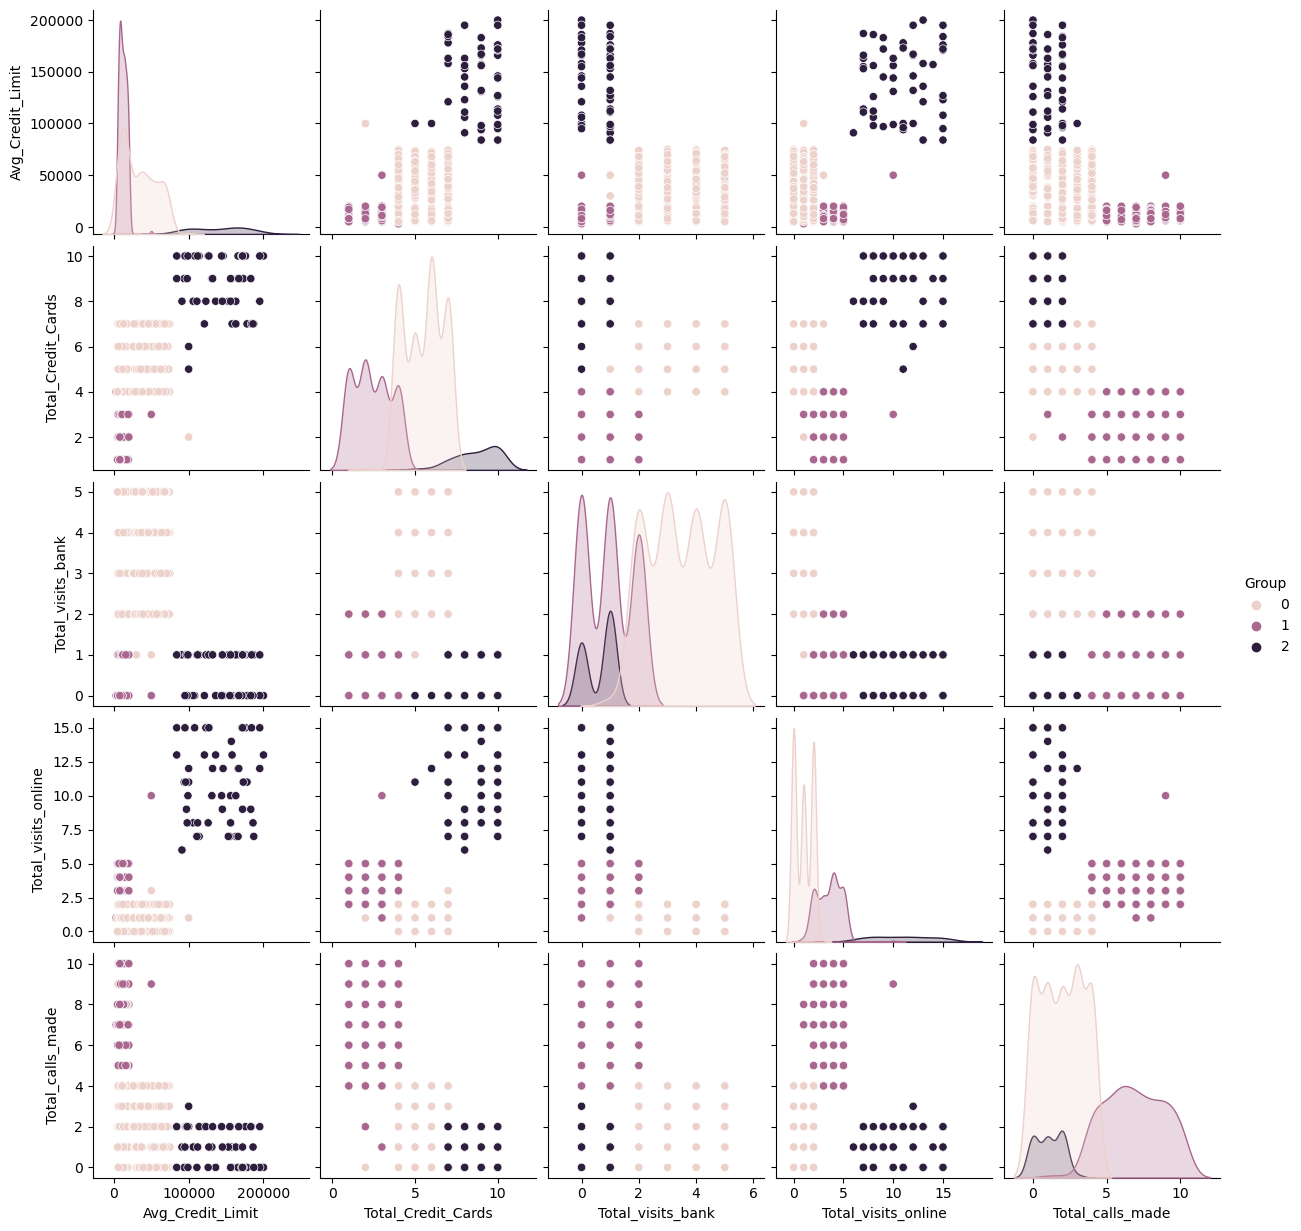

In [115]:
#sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', hue = 'Group', data = data3Groups)
sns.pairplot(data = dataGroups, hue = 'Group')

In [117]:
dataGroups['Group'].value_counts()

0    386
1    224
2     50
Name: Group, dtype: int64

In [118]:
dataClust = dataGroups.groupby(['Group'])
dataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,33782.383,5.516,3.490,0.982,2.000
1,12174.107,2.411,0.933,3.554,6.871
2,141040.000,8.740,0.600,10.900,1.080


Observations:

There are three groups and as predicted they are along the lines of interaction.

Group 0 has the highest number of bank visits, and also a relatively high number of calls made, so this group of customers is old-fashioned in their usage of the bank's services. They mostly prefer to come in, and make almost no online visits, their credit limits and total number of cards fall between the other two groups, so we can assume this is the average customer since it also had the largest number of people. 

Group 1 has the highest average calls made, and the lowest mean visits to the bank. They also have a higher number of online visits than Group 0, this group prefers to not come into the bank to do their business, and prefer calls slightly more than online visits. This group also has the lowest credit limit average, and the lowest card average. The size of the group is still relatively large, so this is the lesser-profitable customer, but a lrage number of these customers is still important for business. 

Group 2 has by far the highest average credit limit and number of cards. This group is also much smaller than the other two, so right off the bat we can tell these are most likely the more affluent customers of the bank, these high-value customers must be taken care of. They also clearly prefer to interact online, with a few number of calls probably for support that cannot be done online. If we had the data of call length I would guess these customers have very short calls. They also do not prefer to come in to the bank at all. 

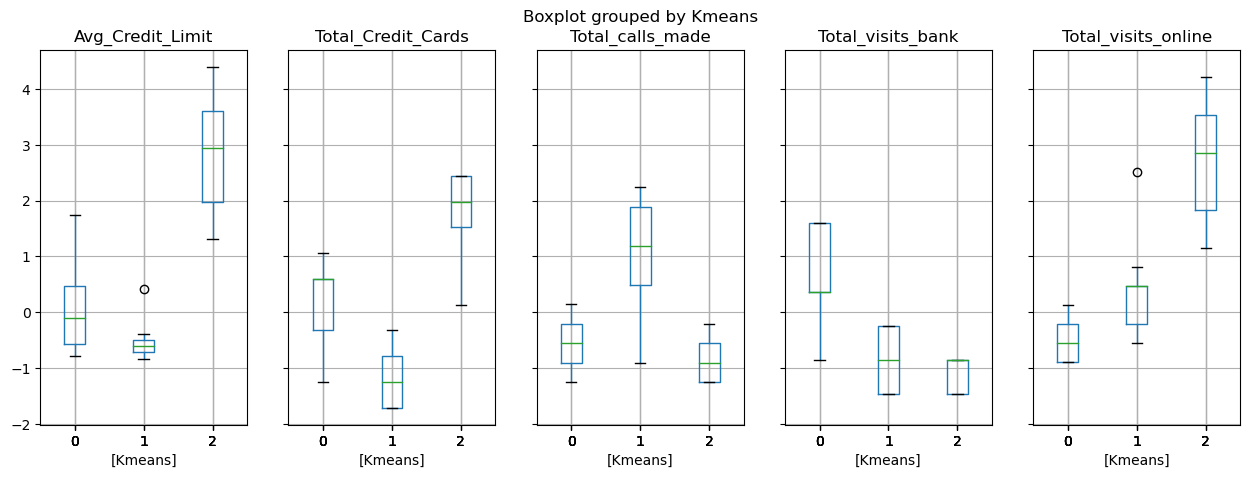

In [119]:
dataScaled['Kmeans'] = prediction
dataScaled.boxplot(by='Kmeans', layout=(1,5), figsize=(15,5))
dataScaled.drop('Kmeans', axis = 1, inplace=True)

## Heirarchical Clustering

In [120]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

links = ["ward", "complete", "average", "single", "weighted", "centroid", "median"]
affs = [
    "braycurtis",
    "canberra",
    "chebyshev",
    "cityblock",
    "correlation",
    "cosine",
    "dice",
    "euclidean",
    "hamming",
    "jaccard",
    "kulsinski",
    "mahalanobis",
    "matching",
    "minkowski",
    "rogerstanimoto",
    "russellrao",
    "seuclidean",
    "sokalmichener",
    "sokalsneath",
    "sqeuclidean",
]

for aff in affs:
    for link in links:
        if link == "ward" and aff != "euclidean":
            pass
        elif link == "centroid" and aff != "euclidean":
            pass
        elif link == "median" and aff != "euclidean":
            pass
        else:
            #            print(link)
            #            print(aff)
            Z = linkage(dataScaled, metric=aff, method=link)
            c, coph_dists = cophenet(Z, pdist(dataScaled))
            if c > 0.75:
                print("affinity:", aff, ", link:", link, ":", c)

affinity: braycurtis , link: single : 0.8502845518924395
affinity: canberra , link: single : 0.7566178713003985
affinity: chebyshev , link: complete : 0.8533474836336782
affinity: chebyshev , link: average : 0.8974159511838106
affinity: chebyshev , link: weighted : 0.8913624010768603
affinity: cityblock , link: complete : 0.8731477899179829
affinity: cityblock , link: average : 0.896329431104133
affinity: cityblock , link: weighted : 0.8825520731498188
affinity: euclidean , link: complete : 0.8599730607972423
affinity: euclidean , link: average : 0.8977080867389372
affinity: euclidean , link: weighted : 0.8861746814895477
affinity: euclidean , link: centroid : 0.8939385846326323
affinity: euclidean , link: median : 0.8893799537016724
affinity: mahalanobis , link: average : 0.8326994115042136
affinity: mahalanobis , link: weighted : 0.7805990615142516
affinity: minkowski , link: complete : 0.8599730607972423
affinity: minkowski , link: average : 0.8977080867389372
affinity: minkowski , 

Looking at all the possible combinations of metrics and linkage methods, it seems that the euclidean and average combination seems best. I will use this combo for my model. 

Text(0.5, 1.0, 'Selecting k with silhouette score')

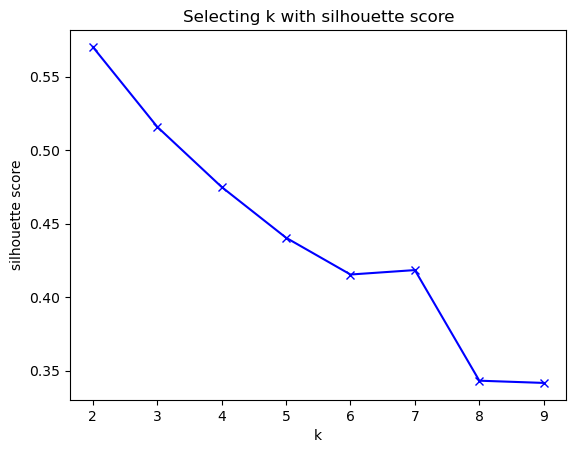

In [121]:
from sklearn.cluster import AgglomerativeClustering

meanDistortions = []

for k in range(2, 10):
    model = AgglomerativeClustering(
        n_clusters=k, affinity="euclidean", linkage="average"
    )
    model.fit(dataScaled)
    prediction = model.labels_
    meanDistortions.append(silhouette_score(dataScaled, prediction))


plt.plot(range(2, 10), meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.title("Selecting k with silhouette score")

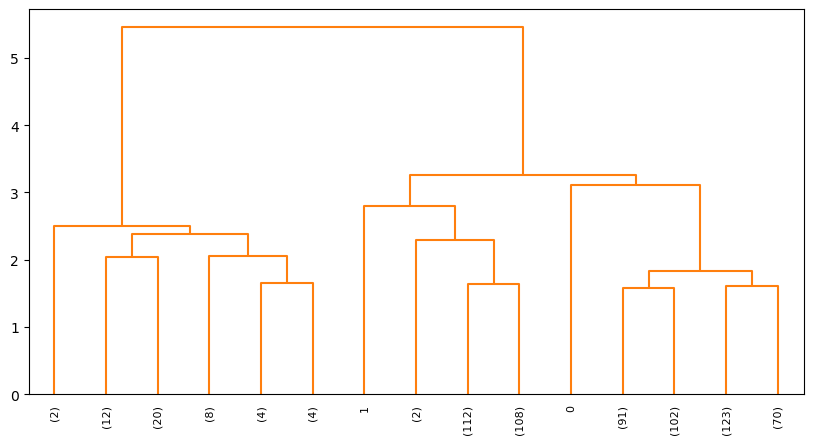

In [122]:
Z = linkage(dataScaled, metric="euclidean", method="average")
c, coph_dists = cophenet(Z, pdist(dataScaled))
plt.figure(figsize=(10, 5))

dendrogram(
    Z,
    p=15,
    truncate_mode="lastp",
    leaf_rotation=90.0,
    color_threshold=40,
    leaf_font_size=8.0,
)
plt.show()

From the dendogram and the silhouette score graph, I think that 3 groups will be the best predictor, any more and there will be groups with very few data points, fewer and there will be one very large and one very small group. This result also follows from the K means custering method.

In [123]:
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
model.fit(dataScaled)
preds = model.labels_
data["Heirarchy"] = preds
dataScaled["Heirarchy"] = preds

data.groupby("Heirarchy").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Heirarchy,,,,,
0,33713.178,5.512,3.486,0.984,2.005
1,141040.000,8.740,0.600,10.900,1.080
2,12197.309,2.404,0.928,3.561,6.883


array([<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[Heirarchy]'>,
       <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[Heirarchy]'>,
       <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[Heirarchy]'>,
       <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[Heirarchy]'>,
       <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[Heirarchy]'>,
       <AxesSubplot:>], dtype=object)

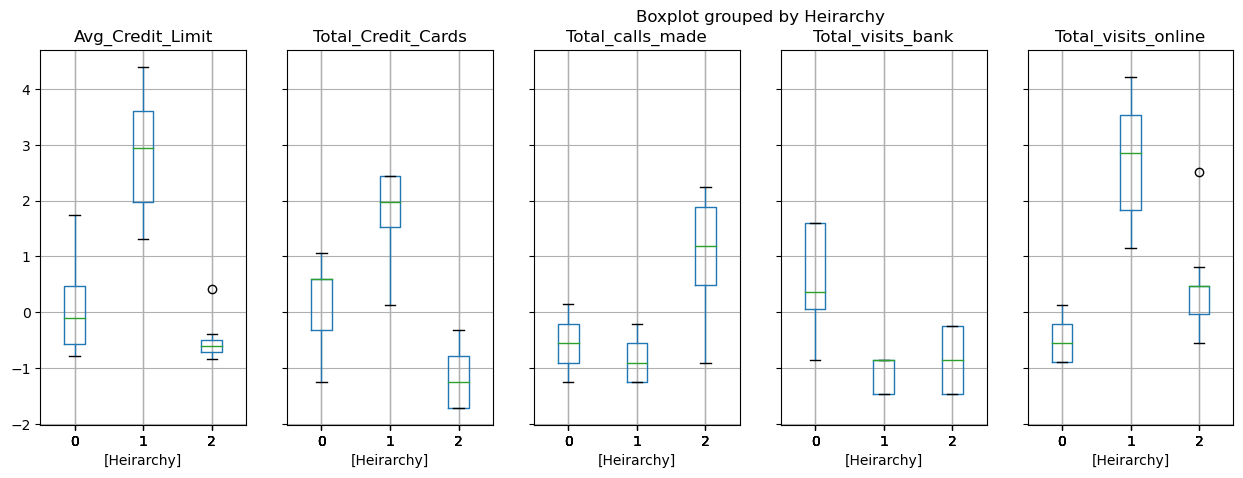

In [124]:
dataScaled.boxplot(by="Heirarchy", layout=(1, 6), figsize=(18, 5))

The results from this method mostly match the results from the K means clustering method, so the same conclusions hold. 

# Observations:

The customers can be broken down mainly into 3 groups:

Group 0 (Average Customer):
* Prefer to interact with the bank mostly through in person visits and sometimes calls, are averse to online banking. 
* Average credit limit of about 33.5K, and have an average of 5.5 credit cards. These are valueable customers.
* Largest group of customers, more than half the customers fall into this group. 

Group 1 (Light Users):
* Prefer to interact with the bank through calls and online visits, averse to bank visits, with an average of less than one visit (meaning about half the people in this group did not come in to the bank at all). 
* Lowest credit limit of the three groups, at only around 12K average. Average of 2.4 credit cards.
* This group accounts for a little less than half the customers, meaning it is a large group. 

Group 3 (High-Value Customers):
* Prefer to interact with the bank almost exclusively through online banking, these customers are tech-savvy and prefer to do their bsuiness with minimal human interaction. 
* Highest credit limit by far, averaging 141K credit, and 8.7 cards. These are the most valuable customers to the bank.
* Smallest group of customers, at just 50 (<10%). 

## Business Reccomendations:

* Since there is a large group of light users, the bank should be trying to upsell these users to get more credit cards, and a higher credit limit overall. This can be achieved through limited time offers of low interest rates and reduced fees targeted specifically at this group of customers. The aim should be to move these customers into the Average Customer group, generating more revenue for the bank. 
* Of the three groups, only the High-Value customers use online banking meaningfully, the bank should be aiming to increase the usage of online banking to reduce costs. Fewer calls and in person visits will mean fewer employees and reduced overhead costs. This can be achieved through sales that are only valid if an account is created through the online portal. Or it can also be achieved simply through customer education, taking opportunities to teach customers ow to use the online portal to get them more comfortable with it. I would suggest that when a customer comes in to create an account, the employee can also have the customer download and sign into their app, and give them a quick tutorial. 
* The high-value customers are very important to the bak since they have a much higher credit limit on average and have more cards. To keep these customers around the bank can offer loyalty rewards of some kind so that customers will have more incentive to stick with their same accounts. 